In [6]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [7]:
from itertools import product

def generate_monomials(variables, m):
    monomials = []
    for degree in range(m + 1):
        for powers in product(range(degree + 1), repeat=len(variables)):
            if sum(powers) == degree:
                monomial_parts = [variables[i] for i, power in enumerate(powers) for _ in range(power)]
                monomial = ' * '.join(monomial_parts) if monomial_parts else '1'
                monomials.append(monomial)
    
    return monomials

result = generate_monomials(['x', 'y'], 3)
print(result)


['1', 'y', 'x', 'y * y', 'x * y', 'x * x', 'y * y * y', 'x * y * y', 'x * x * y', 'x * x * x']


[(1.0009429839939843, 0.00021993030690193108), (0.9785747586554093, 0.20871192748425882), (0.914012338423937, 0.4077121659265461), (0.80935511149314, 0.5874133431703218), (0.6699813127392771, 0.7425577204282658), (0.49900508264196247, 0.865559687465009), (0.30936882344788563, 0.950200916942694), (0.10468827012990735, 0.9943494597525719), (-0.10454657763609657, 0.9937638574506071), (-0.30836920025277176, 0.9519824460502212), (-0.4994371255854339, 0.8660824382596516), (-0.6692122485700802, 0.7431041581422396), (-0.808196841575346, 0.587093967170332), (-0.914189724279086, 0.4072465967525545), (-0.9776062375530845, 0.20815249736151026), (-0.9996483583466639, -0.0005343621579985316), (-0.9780071050800607, -0.2069472687900059), (-0.9143086137613701, -0.40726275768231485), (-0.8084086927167936, -0.5886333786210651), (-0.6695460017906554, -0.7431484573680769), (-0.49967256499297735, -0.8656683104241676), (-0.30859396951852675, -0.950077580981381), (-0.10451374959845358, -0.9947305942370595), (

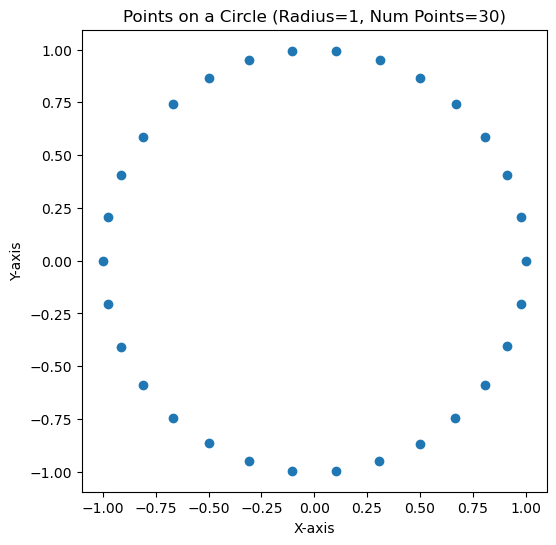

In [8]:
def linspace_circle(radius, num_points):
    points = []
    for i in range(num_points):
        angle = 2 * math.pi * i / num_points  
        x = radius * math.cos(angle)  
        y = radius * math.sin(angle)  
        
        noise_x = random.uniform(-0.001, 0.001)  # Adjust the range as needed
        noise_y = random.uniform(-0.001, 0.001)  # Adjust the range as needed

        x += noise_x
        y += noise_y
        
        points.append((x, y))  
    return points

circle_radius = 1
num_points = 30

circle_points = linspace_circle(circle_radius, num_points)
print(circle_points)

x_coords, y_coords = zip(*circle_points)

plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords)
plt.title(f'Points on a Circle (Radius={circle_radius}, Num Points={num_points})')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')  
plt.show()

In [9]:
def multivariate_vandermonde_matrix(data, degree):
    variables = [f'x{i}' for i in range(degree)]
    monomials = generate_monomials(variables, degree)
    print(monomials)
    vand = []
    for d in data:
        vals = {f'x{i}':d[i] for i in range(len(d))}
        vand.append([eval(monomials[i], vals) for i in range(len(monomials))])
        
    return np.stack(vand)

data = circle_points
degree = 2

A = np.array(multivariate_vandermonde_matrix(data, degree))
print(A)

def find_kernel(A):
    U, S, Vt = np.linalg.svd(A)
    tolerence = np.finfo(np.float64).eps * np.max(S[0]) * max(A.shape)
    count = np.sum(S < tolerence)
    return Vt[-count:,:]

basis = np.linalg.lstsq(A, np.zeros(A.shape[0]), rcond='warn')
basis
# basis = find_kernel(A.T @ A)
# basis



['1', 'x1', 'x0', 'x1 * x1', 'x0 * x1', 'x0 * x0']
[[ 1.00000000e+00  2.19930307e-04  1.00094298e+00  4.83693399e-08
   2.20137698e-04  1.00188686e+00]
 [ 1.00000000e+00  2.08711927e-01  9.78574759e-01  4.35606687e-02
   2.04240224e-01  9.57608558e-01]
 [ 1.00000000e+00  4.07712166e-01  9.14012338e-01  1.66229210e-01
   3.72653950e-01  8.35418555e-01]
 [ 1.00000000e+00  5.87413343e-01  8.09355111e-01  3.45054436e-01
   4.75425992e-01  6.55055697e-01]
 [ 1.00000000e+00  7.42557720e-01  6.69981313e-01  5.51391968e-01
   4.97499796e-01  4.48874959e-01]
 [ 1.00000000e+00  8.65559687e-01  4.99005083e-01  7.49193573e-01
   4.31918683e-01  2.49006073e-01]
 [ 1.00000000e+00  9.50200917e-01  3.09368823e-01  9.02881783e-01
   2.93962540e-01  9.57090689e-02]
 [ 1.00000000e+00  9.94349460e-01  1.04688270e-01  9.88730848e-01
   1.04096725e-01  1.09596339e-02]
 [ 1.00000000e+00  9.93763857e-01 -1.04546578e-01  9.87566604e-01
  -1.03894610e-01  1.09299869e-02]
 [ 1.00000000e+00  9.51982446e-01 -3.083

C:\Users\Shawn's ThinkPad\AppData\Local\Temp\ipykernel_24788\2643685607.py:24: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  basis = np.linalg.lstsq(A, np.zeros(A.shape[0]), rcond='warn')


(array([0., 0., 0., 0., 0., 0.]),
 array([0.]),
 6,
 array([6.70770124e+00, 3.87325923e+00, 3.87183554e+00, 2.73800673e+00,
        1.93604968e+00, 3.75244218e-03]))